In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


# libraries

In [2]:
# pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import re
#import contractions

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [4]:
df.rename(columns={0:'target', 1:'id', 2:'date', 3:'flag', 4:'user', 5:'text'}, inplace=True)

df.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
display(df.isnull().sum())

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
df.drop(['id', 'date', 'flag', 'user'], axis=1, inplace=True)

df.head(5)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Optional: convert to lowercase
    text = text.lower()
    # Optional: remove extra whitespace
    text = ' '.join(text.split())
    return text

In [8]:
df['text'] = df['text'].apply(clean_text)

In [9]:
df.head()

,target,text
0,0,switchfoot awww thats a bummer you shoulda got...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


In [10]:
duplicate_in_text = df.duplicated(subset=['text'])
if duplicate_in_text.any():
    print(df.loc[~duplicate_in_text], end='\n\n')

         target                                               text
0             0  switchfoot awww thats a bummer you shoulda got...
1             0  is upset that he cant update his facebook by t...
2             0  kenichan i dived many times for the ball manag...
3             0     my whole body feels itchy and like its on fire
4             0  nationwideclass no its not behaving at all im ...
...         ...                                                ...
1599995       4  just woke up having no school is the best feel...
1599996       4    thewdbcom very cool to hear old walt interviews
1599997       4  are you ready for your mojo makeover ask me fo...
1599998       4  happy 38th birthday to my boo of alll time tup...
1599999       4  happy charitytuesday thenspcc sparkscharity sp...

[1565485 rows x 2 columns]



In [11]:
df.drop_duplicates(subset=['text'], inplace=True)
print(df)

         target                                               text
0             0  switchfoot awww thats a bummer you shoulda got...
1             0  is upset that he cant update his facebook by t...
2             0  kenichan i dived many times for the ball manag...
3             0     my whole body feels itchy and like its on fire
4             0  nationwideclass no its not behaving at all im ...
...         ...                                                ...
1599995       4  just woke up having no school is the best feel...
1599996       4    thewdbcom very cool to hear old walt interviews
1599997       4  are you ready for your mojo makeover ask me fo...
1599998       4  happy 38th birthday to my boo of alll time tup...
1599999       4  happy charitytuesday thenspcc sparkscharity sp...

[1565485 rows x 2 columns]


In [12]:
boolean = df.duplicated(subset=['text']).any()
print(boolean, end='\n\n') # True

False



In [13]:
X = df['text'].to_numpy()
y = df['target'].to_numpy()

In [14]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 20% for test
    random_state=42
)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.25,  # 0.25 of 80% = 20% of original data
    random_state=42
)

In [16]:
print(f"Train size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

Train size: 939291 (60.0%)
Validation size: 313097 (20.0%)
Test size: 313097 (20.0%)


In [17]:
print("first training text",X_train[0], "type of X_train:",type(X_train))
print("first training target",y_train[0], "type of y_train:",type(y_train))

first training text starting flight itinerary car rental hotel arrangements type of X_train: <class 'numpy.ndarray'>
first training target 0 type of y_train: <class 'numpy.ndarray'>


In [18]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

In [19]:
# y_train = np.where(y_train == 4, 1, y_train)
# y_val = np.where(y_val == 4, 1, y_val)
# y_test = np.where(y_test == 4, 1, y_test)

In [35]:
y_train

array([0, 1, 0, ..., 1, 0, 1])

In [20]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
def tokenize_data(texts, max_length=128):
    return tokenizer(
        texts.tolist(),           # Convert NumPy array to list
        max_length=max_length,    # Max sequence length (adjust as needed)
        padding='max_length',     # Pad shorter sequences
        truncation=True,          # Truncate longer sequences
        return_tensors='tf'       # Return TensorFlow tensors
    )

In [22]:
# train_encodings = tokenize_data(X_train)
# val_encodings = tokenize_data(X_val)
# test_encodings = tokenize_data(X_test)

In [23]:
# # Create TensorFlow datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(train_encodings),  # Input features (input_ids, attention_mask)
#     y_train                 
# )).shuffle(1000).batch(16)  

# val_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(val_encodings),
#     y_val
# )).batch(16)

# test_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(test_encodings),
#     y_test
# )).batch(16)

In [24]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Typical learning rate for BERT
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Use if labels are integers
# metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')  # Use if labels are integers

# model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [25]:
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=2  
# )

Epoch 1/2
58706/58706 [==============================] - 16786s 285ms/step - loss: 0.3595 - accuracy: 0.8402 - val_loss: 0.3358 - val_accuracy: 0.8528
Epoch 2/2
58706/58706 [==============================] - 16710s 285ms/step - loss: 0.2941 - accuracy: 0.8747 - val_loss: 0.3502 - val_accuracy: 0.8526


In [34]:
tokenizer.save_pretrained('/kaggle/working/my_bert_model')

('/kaggle/working/my_bert_model/tokenizer_config.json',
 '/kaggle/working/my_bert_model/special_tokens_map.json',
 '/kaggle/working/my_bert_model/vocab.txt',
 '/kaggle/working/my_bert_model/added_tokens.json')

In [28]:
model = TFBertForSequenceClassification.from_pretrained('/kaggle/working/my_bert_model')

# Save again 
model.save_pretrained('/kaggle/working/my_bert_model')
print("Model saved to /kaggle/working/my_bert_model")

Some layers from the model checkpoint at /kaggle/working/my_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /kaggle/working/my_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Model saved to /kaggle/working/my_bert_model


In [26]:
# #save the model

# model.save_pretrained('/kaggle/working/my_bert_model')
# print("Model saved to /kaggle/working/my_bert_model")

Model saved to /kaggle/working/my_bert_model


In [30]:
#model = TFBertForSequenceClassification.from_pretrained('path/to/your/unzipped/my-bert-model')
model = TFBertForSequenceClassification.from_pretrained('/kaggle/working/my_bert_model')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at /kaggle/working/my_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /kaggle/working/my_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [33]:
new_text = ["The service was horrible"]
encodings = tokenizer(new_text, max_length=128, padding='max_length', truncation=True, return_tensors='tf')
predictions = model.predict(dict(encodings))
predicted_labels = tf.argmax(predictions.logits, axis=1).numpy()
print(predicted_labels)

1/1 [==============================] - 0s 42ms/step
[0]


In [27]:
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print(f"Test accuracy: {test_accuracy}")

19569/19569 [==============================] - 1820s 93ms/step - loss: 0.3503 - accuracy: 0.8529
Test accuracy: 0.8528667092323303


In [36]:
from sklearn.metrics import f1_score, classification_report

In [40]:
# predictions = model.predict(test_dataset)
# predicted_labels = tf.argmax(predictions.logits, axis=1).numpy()



In [39]:
# Compute F1 score
f1 = f1_score(y_test, predicted_labels, average='weighted')
print(f"F1 Score: {f1}")
print(classification_report(y_test, predicted_labels, target_names=['negative', 'positive']))

F1 Score: 0.8527852291537343
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86    156155
    positive       0.87      0.83      0.85    156942

    accuracy                           0.85    313097
   macro avg       0.85      0.85      0.85    313097
weighted avg       0.85      0.85      0.85    313097



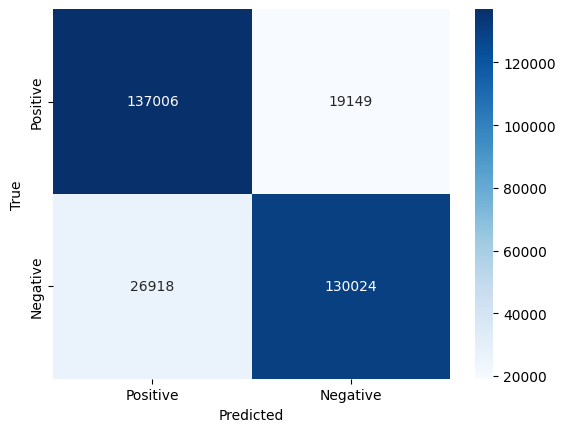

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()